In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [30]:
# Load sales dataset
df = pd.read_csv("SuperMarket Analysis.csv")  

# Display first 5 rows
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [34]:
# Fill missing values without inplace to avoid FutureWarning
if region_col:
    df[region_col] = df[region_col].fillna('Unknown')
if product_col:
    df[product_col] = df[product_col].fillna('Unknown')

# Drop duplicates
df = df.drop_duplicates()

print("Data cleaning done ✅")


Data cleaning done ✅


In [36]:
# Summary statistics for numeric columns
print("Summary Statistics:\n")
print(df.describe())

# Count by Region (using detected column)
if region_col:  # make sure region_col is defined
    region_counts = df[region_col].value_counts()
    print(f"\nCounts by {region_col}:\n", region_counts)
else:
    print("\nNo Region column found for counting.")


Summary Statistics:

        Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905

In [38]:
# Top 5 products by total sales
if product_col:
    top_products = df.groupby(product_col)['Sales'].sum().sort_values(ascending=False).head()
    print("Top 5 Products by Sales:\n", top_products)

# Top 5 regions by total sales
if region_col:
    top_regions = df.groupby(region_col)['Sales'].sum().sort_values(ascending=False).head()
    print("\nTop 5 Regions by Sales:\n", top_regions)


Top 5 Products by Sales:
 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: Sales, dtype: float64


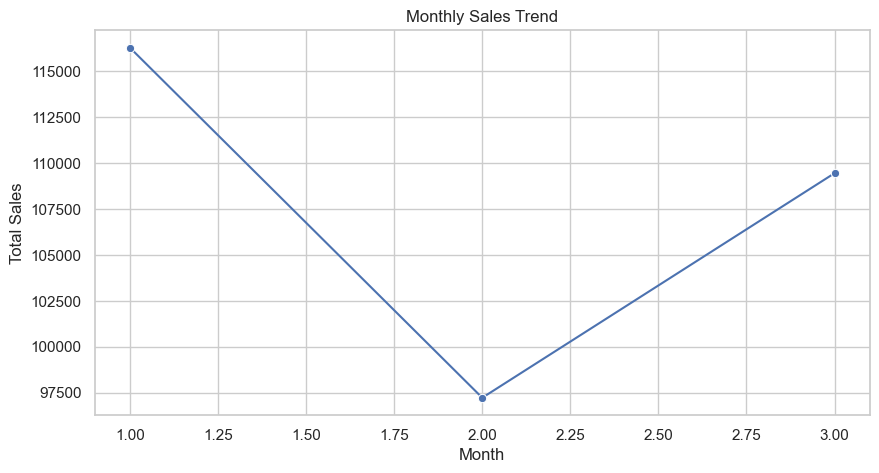

In [40]:
# Convert 'Date' column to datetime
date_col = None
for col in df.columns:
    if 'date' in col.lower():
        date_col = col

if date_col:
    df[date_col] = pd.to_datetime(df[date_col])
    df['Month'] = df[date_col].dt.month

    monthly_sales = df.groupby('Month')['Sales'].sum()

    # Plot monthly sales
    plt.figure(figsize=(10,5))
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.show()
else:
    print("No Date column found!")


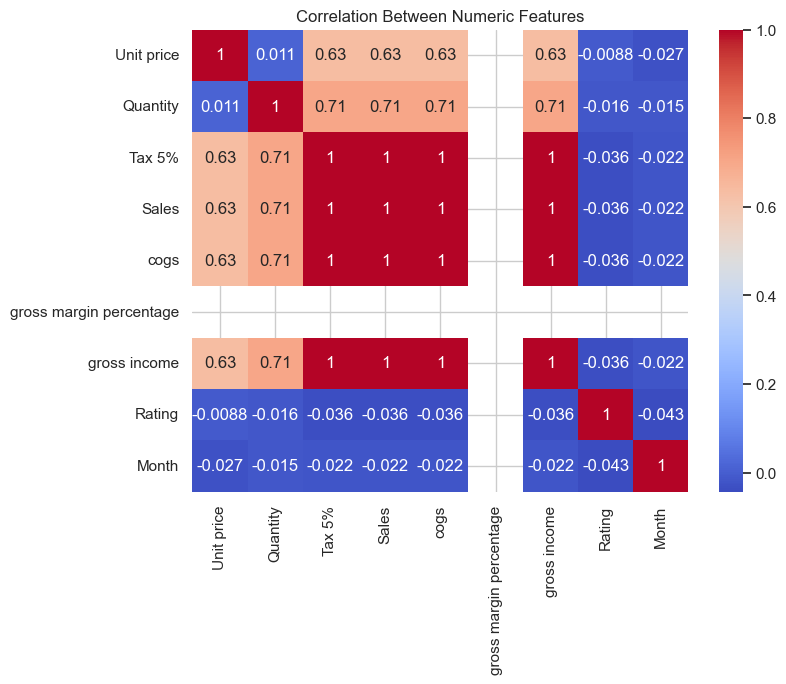

In [46]:
# Correlation matrix for numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Between Numeric Features")
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")


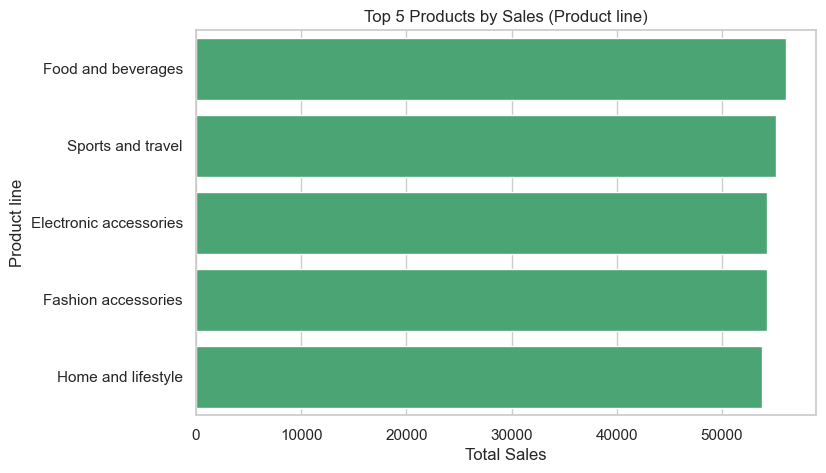

In [48]:
# Bar chart for top products (future-proof)
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, color='mediumseagreen')
plt.title(f"Top 5 Products by Sales ({product_col})")
plt.xlabel("Total Sales")
plt.ylabel(product_col)
plt.show()


In [49]:
print("✅ Key Insights:")

# Top products
if product_col:
    top_products = df.groupby(product_col)['Sales'].sum().sort_values(ascending=False).head()
    print(f"\n- Top Selling Products ({product_col}):")
    print(top_products)

# Top regions
if region_col:
    top_regions = df.groupby(region_col)['Sales'].sum().sort_values(ascending=False).head()
    print(f"\n- Top Selling Regions ({region_col}):")
    print(top_regions)

# Monthly sales trend summary
if 'Month' in df.columns:
    monthly_sales = df.groupby('Month')['Sales'].sum()
    print("\n- Monthly Sales Trend (Total Sales per Month):")
    print(monthly_sales)

# Correlation summary
numeric_cols = df.select_dtypes(include=np.number).columns
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    print("\n- Correlations Between Numeric Features:")
    print(corr)

print("\n- Data cleaning improved reliability.")



✅ Key Insights:

- Top Selling Products (Product line):
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: Sales, dtype: float64

- Monthly Sales Trend (Total Sales per Month):
Month
1    116291.868
2     97219.374
3    109455.507
Name: Sales, dtype: float64

- Correlations Between Numeric Features:
                         Unit price  Quantity    Tax 5%     Sales      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Sales                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       